# **Dataset Description:**

  - The Predictive Maintenance Classification Dataset is designed to help predict potential failures or breakdowns in industrial machinery based on various sensor measurements and operational conditions. Predictive maintenance models like this can be critical for minimizing equipment downtime and reducing repair costs in industrial settings.


# **Columns Description:**



**UDI:** Unique identifier for each machine.


**Product ID:** Identifier for the type of product being manufactured.


**Type:** Type of the machine. Machines are of three types: L, M, and H, each representing different operational conditions and categories of products being produced.


**Air temperature [K]:** The air temperature around the machine during operation.


**Process temperature [K]:** The temperature during the manufacturing process.


**Rotational speed [rpm]:** The rotational speed of the machine.


**Torque [Nm]:** The torque (rotational force) applied to the machine.


**Tool wear [min]:** The amount of wear on the tool being used in the process.


**Target:** The binary target feature that indicates whether the machine failed (1) or not (0). This is the main feature you will be predicting.


**Failure Type:** Type of failure that occurred in the machine. It includes five possible failure modes:

1. TWF: Tool Wear Failure.

2. HDF: Heat Dissipation Failure.

3. PWF: Power Failure.

4. OSF: Overstrain Failure.

5. RNF: Random Failures.

# **Key Points:**

The dataset is highly **suitable for classification tasks**.

**Imbalanced data:** Since actual machine failures are less frequent compared to normal operations, we addressed the class imbalance using the SMOTE, which generates synthetic samples for the minority class to balance the dataset during model training.


# **Goal:**

The primary objective is to build a machine learning model that can predict machine failures based on sensor readings, allowing for preventive action before an actual failure occurs.


# **Potential Analysis/Approaches:**

### **Exploratory Data Analysis (EDA):**

Explore relationships between features such as rotational speed, air temperature, and torque, and their impact on failures.
Data Balancing:

### **Use SMOTE:**
 to address class imbalance in the target variable, ensuring a more balanced dataset for training.

### **Modeling:**

Utilize classification algorithms such as Decision Trees, Support Vector Classification, and Random Forests to predict failures.

Implement Principal Component Analysis (PCA) for dimensionality reduction to enhance model performance.

### **Advanced Techniques:**

apply hyperparameter tuning for the Random Forest model using Bayesian optimization techniques to optimize model parameters effectively.

### **Evaluation:**

Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC to determine how well the model can predict failures.


# **Example Use Case:**

### **The predictive maintenance model developed through this project can help companies:**

**Enhance Equipment Reliability:**

  - By predicting potential failures before they occur, companies can perform maintenance at optimal times, ensuring machinery operates smoothly and reliably.



**Lower Maintenance Costs:**

- Predictive maintenance allows for targeted repairs rather than routine, scheduled maintenance, which can reduce overall maintenance expenses and extend the lifespan of machinery.

**Improve Safety:**

 - By preventing equipment failures, companies can ensure a safer working environment for employees, reducing the risk of accidents and injuries caused by malfunctioning equipment.

**Increase Efficiency:**

 - Analyzing data trends can help optimize machinery performance, leading to improved efficiency and productivity in manufacturing processes.



In [63]:
!pip install ydata_profiling
!pip install scikit-optimize
!pip install imblearn
!pip install yellowbrick
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00


#import libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from ydata_profiling import ProfileReport
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

import warnings
warnings.filterwarnings("ignore")

#load the data

In [26]:
data = pd.read_csv("predictive_maintenance.csv")

#show the head of data

In [27]:
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

#show the tail

In [28]:
data.tail()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure

#shape of data

In [29]:
data.shape

(10000, 10)

#information about data(data type and non-null)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


#mathematic info about data (numeric)

In [31]:
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

#math info for object data

In [32]:
data.describe(include='O')

Product ID   Type Failure Type
count       10000  10000        10000
unique      10000      3            6
top        M14860      L   No Failure
freq            1   6000         9652

#sum of null in each column

In [33]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

#sum of duplicated data

In [34]:
data.duplicated().sum()

0

# no of unique values in each column

In [35]:
data.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

#visualize count of unique values in "Type "column


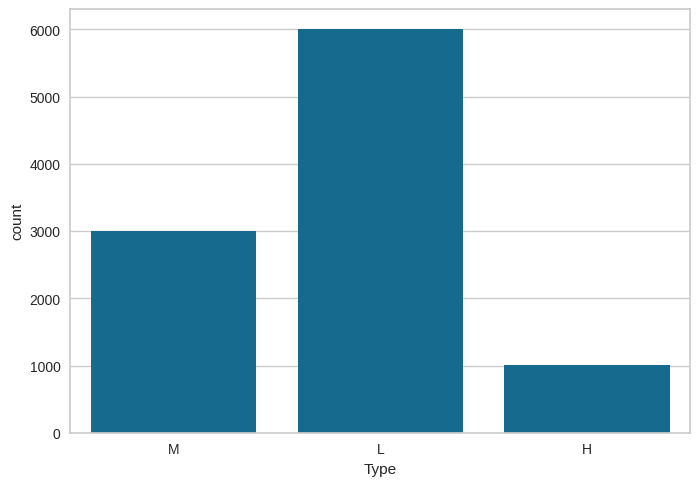

In [36]:
sns.countplot(data=data,x="Type")
plt.show()

#visualize count of unique values in " Failure Type "column

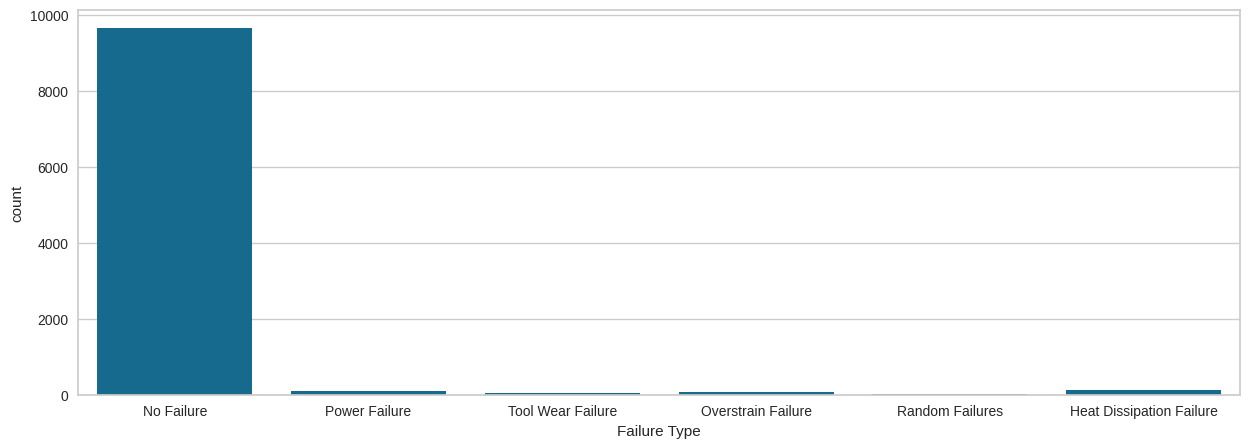

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Failure Type")
plt.show()

#drop "Failure Type" column from our dataset

In [38]:
data.drop(columns=['Failure Type'], inplace=True)

#visualize count of unique values in "Target "column

<Axes: xlabel='Target', ylabel='count'>

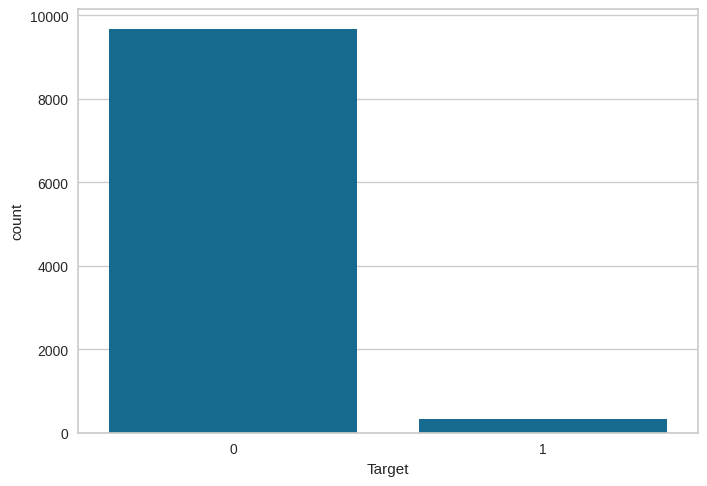

In [39]:
sns.countplot(data=data,x="Target")

# drop ("UDI","Product ID")

In [40]:
data.drop(columns=['UDI', 'Product ID'], inplace= True)

#rename columns

In [41]:
data = data.rename({'Air temperature [K]': 'Air temperature',
                       'Process temperature [K]': 'Process temperature',
                       'Rotational speed [rpm]': 'Rotational speed',
                       'Torque [Nm]': 'Torque',
                       'Tool wear [min]': 'Tool wear'}, axis=1)

#visualize distribution for each column using "Hist plot"

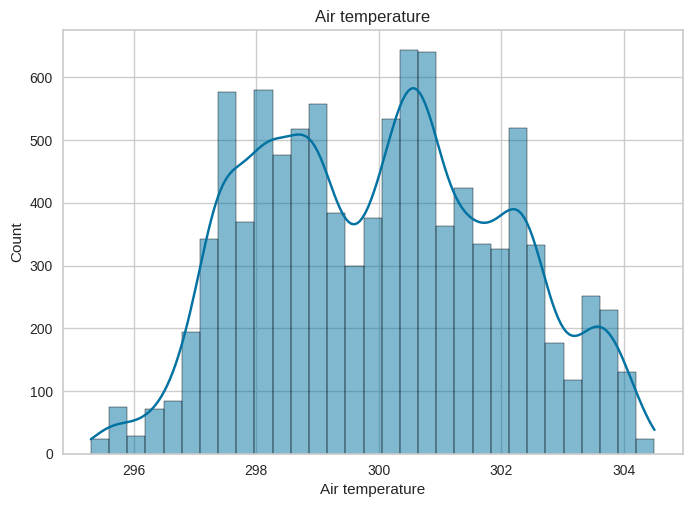

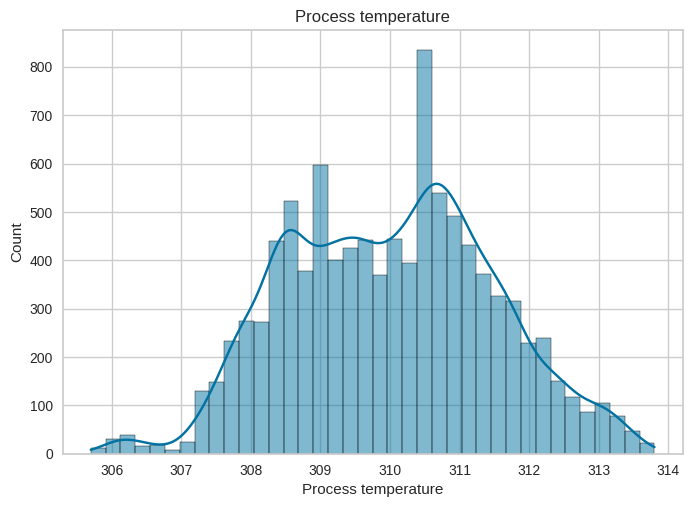

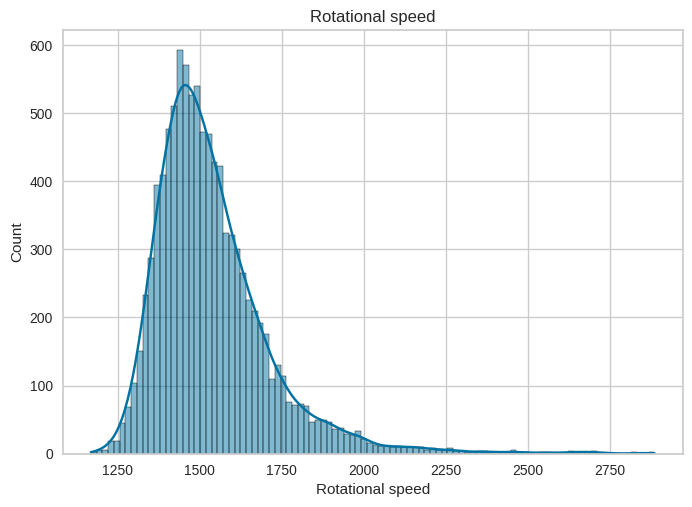

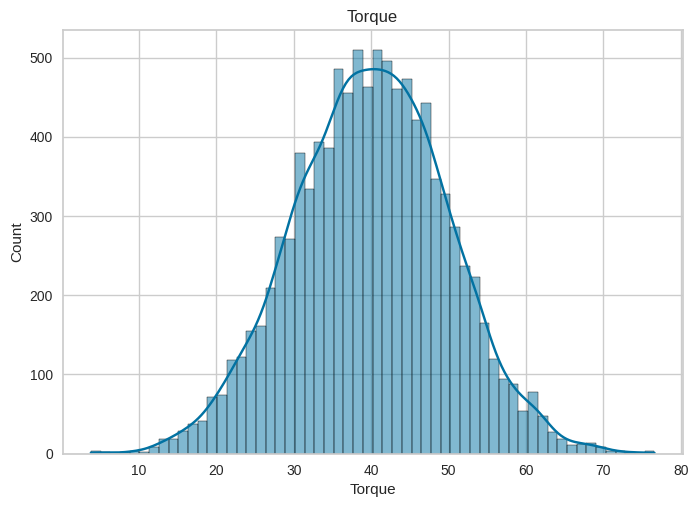

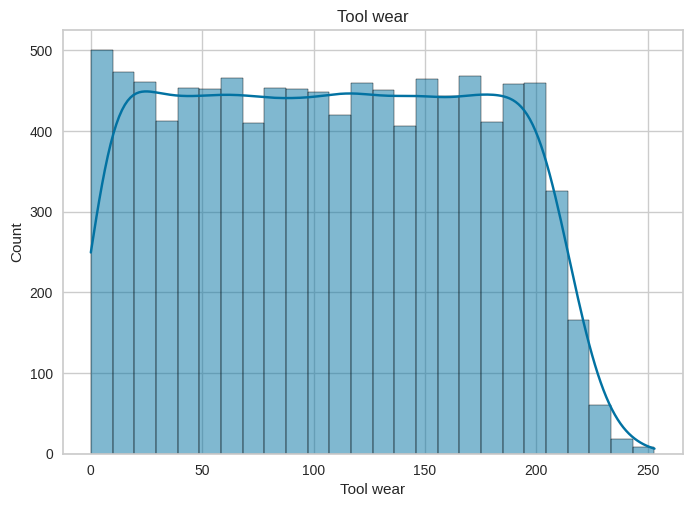

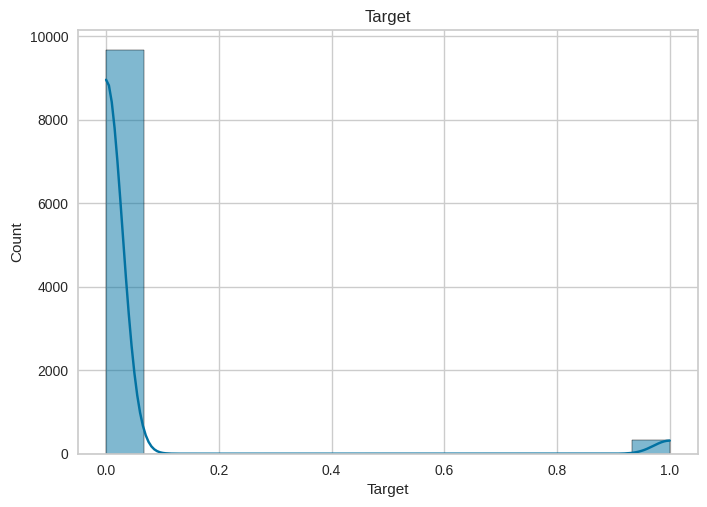

In [42]:
numerical_data = data.select_dtypes(include='number')
for i in numerical_data:
    sns.histplot(data[i],kde=True)
    plt.title(i)
    plt.show()

#categorical conversion using "Label Encoder" for "Type" column

In [43]:
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])


#--standardization for data without (target and Type)



In [44]:
sc = StandardScaler()
to_scale = ["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear"]
data[to_scale] = sc.fit_transform(data[to_scale])

# --Box plot to see the outliers in data.

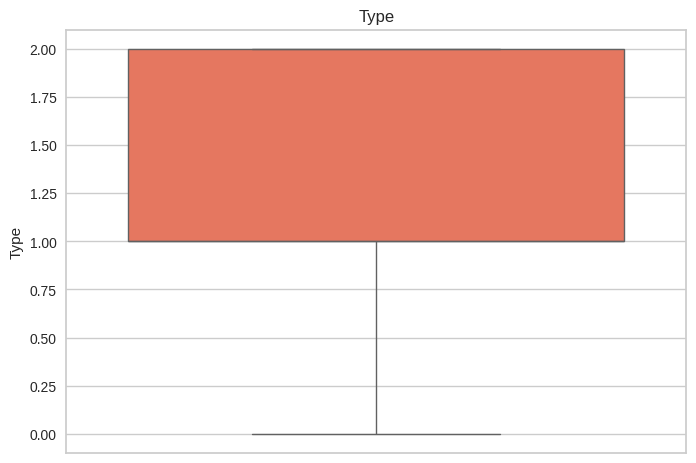

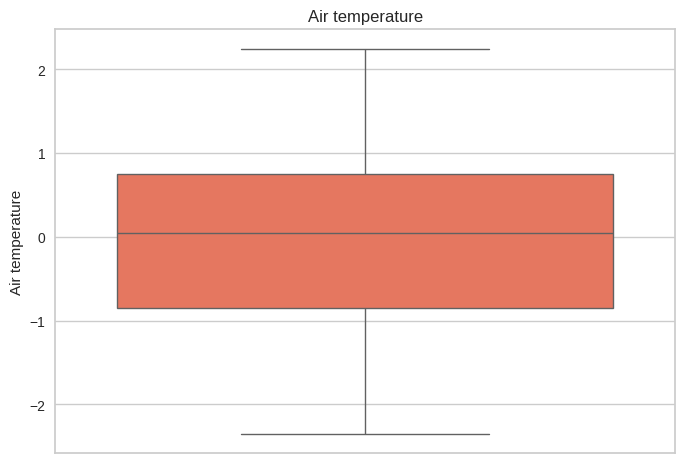

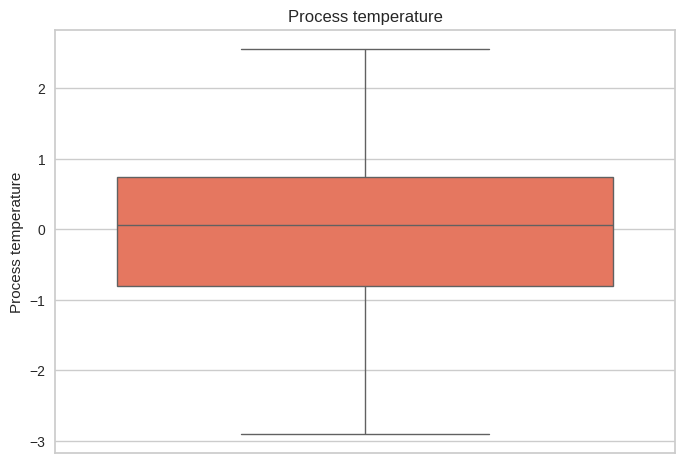

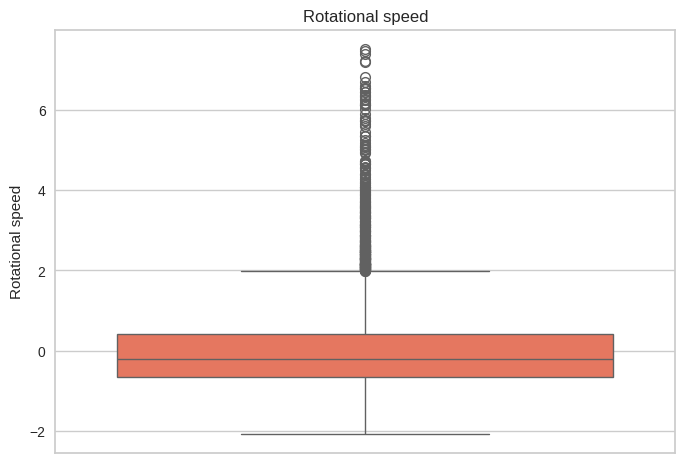

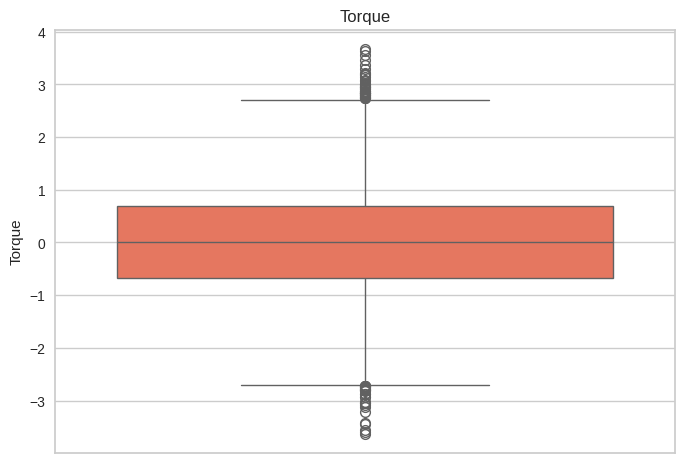

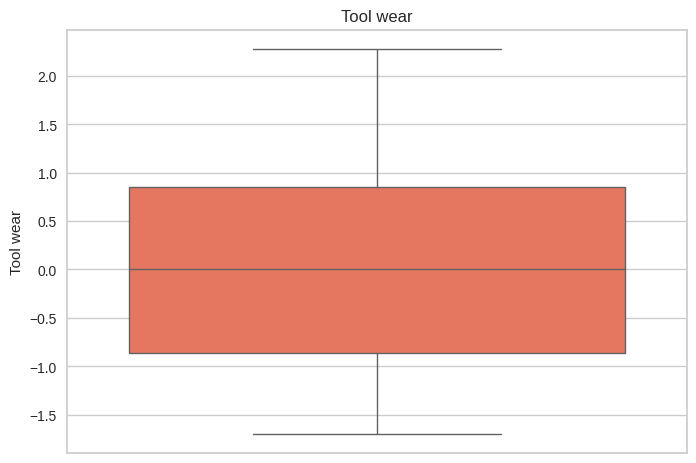

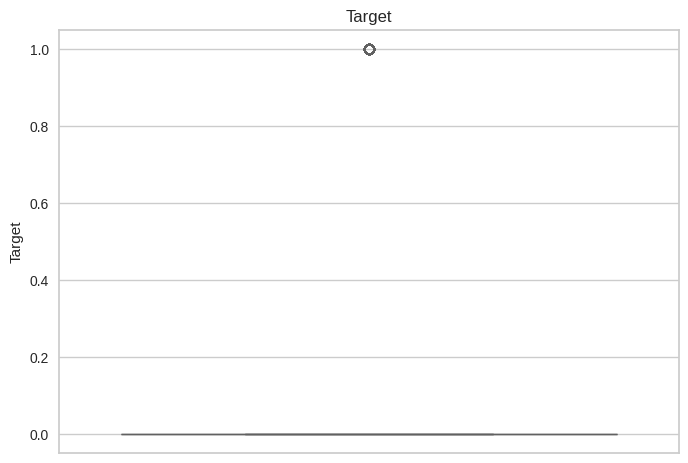

In [45]:
numerical_data = data.select_dtypes(include='number')
for i in numerical_data:
    sns.boxplot(data[i],palette='Reds')
    plt.title(i)
    plt.show()

#remove outliers for specific column

In [46]:
data = data[(stats.zscore(data['Rotational speed']) < 1.9)]
data  = data[(stats.zscore(data['Torque']) < 2.8)]
data.reset_index(drop=True,inplace=True)

#Visualize the box plot again to ensure that the data no longer has outliers

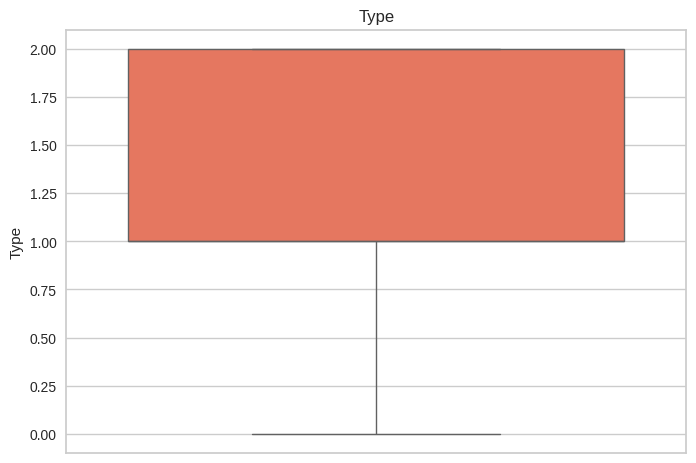

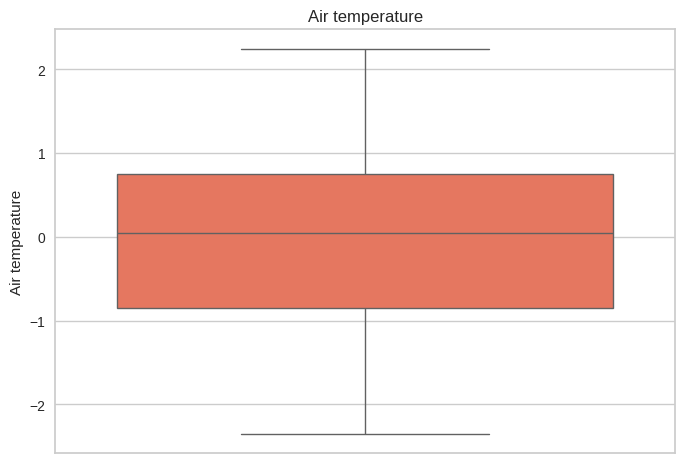

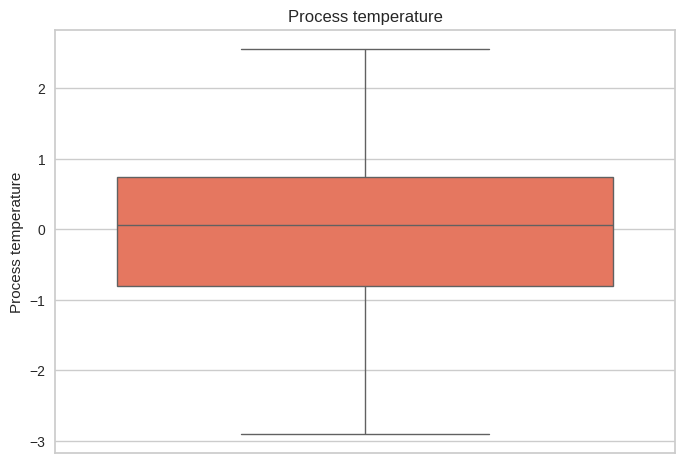

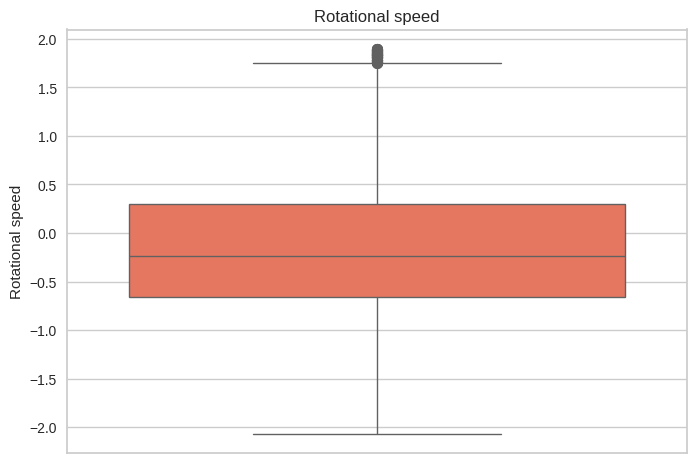

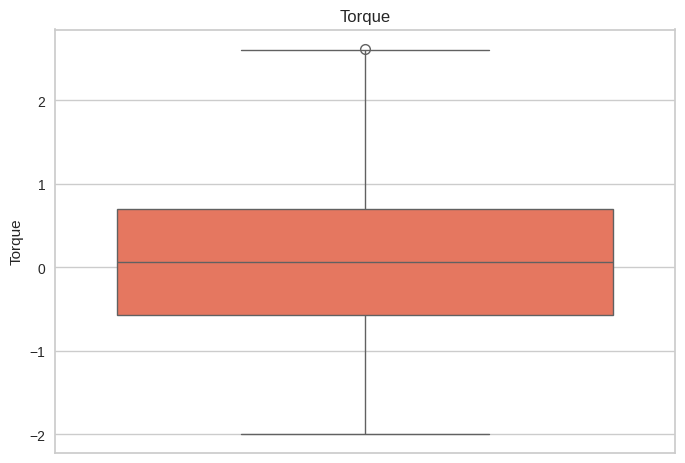

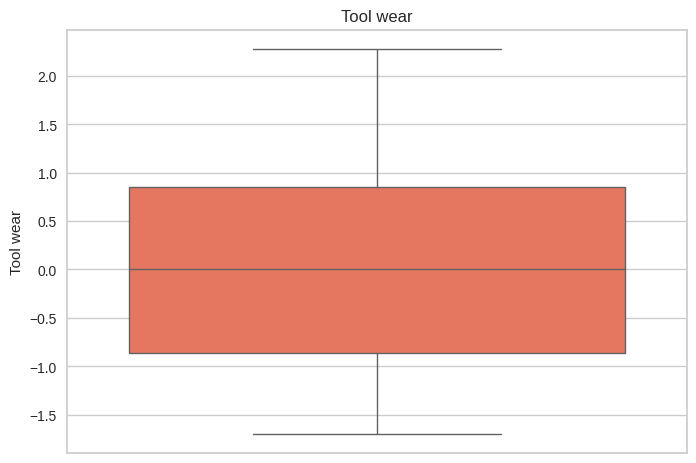

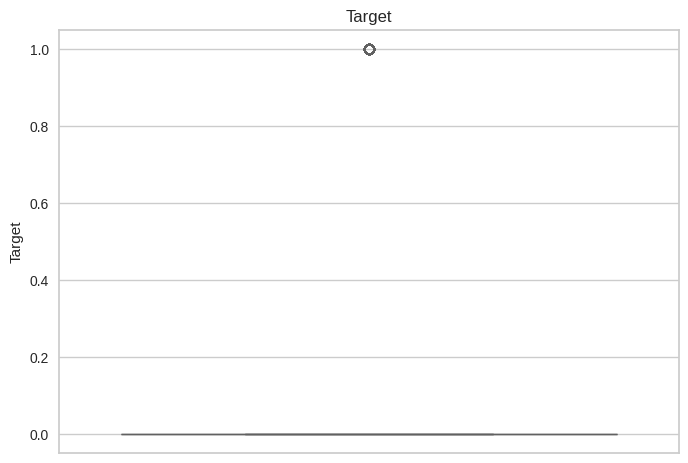

In [47]:
numerical_data = data.select_dtypes(include='number')
for i in numerical_data:
    sns.boxplot(data[i],palette='Reds')
    plt.title(i)
    plt.show()

# apply heatmap on data to see correlations between the data

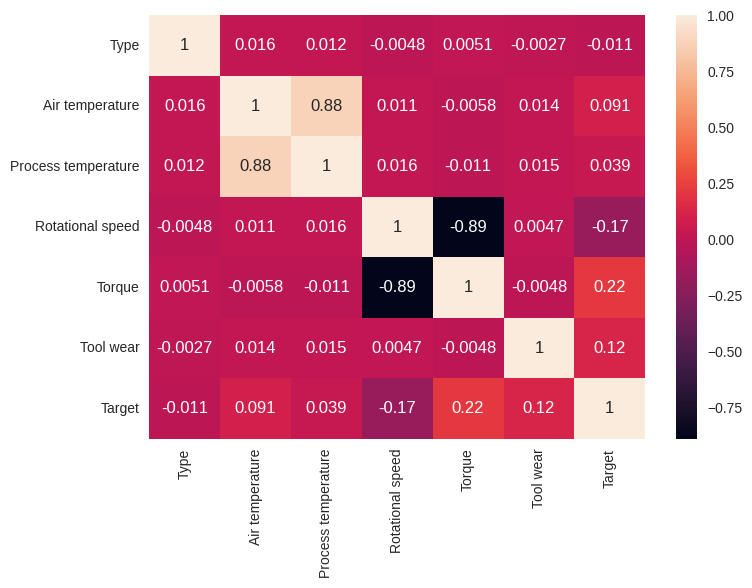

In [48]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# pair plot to see the shape of data

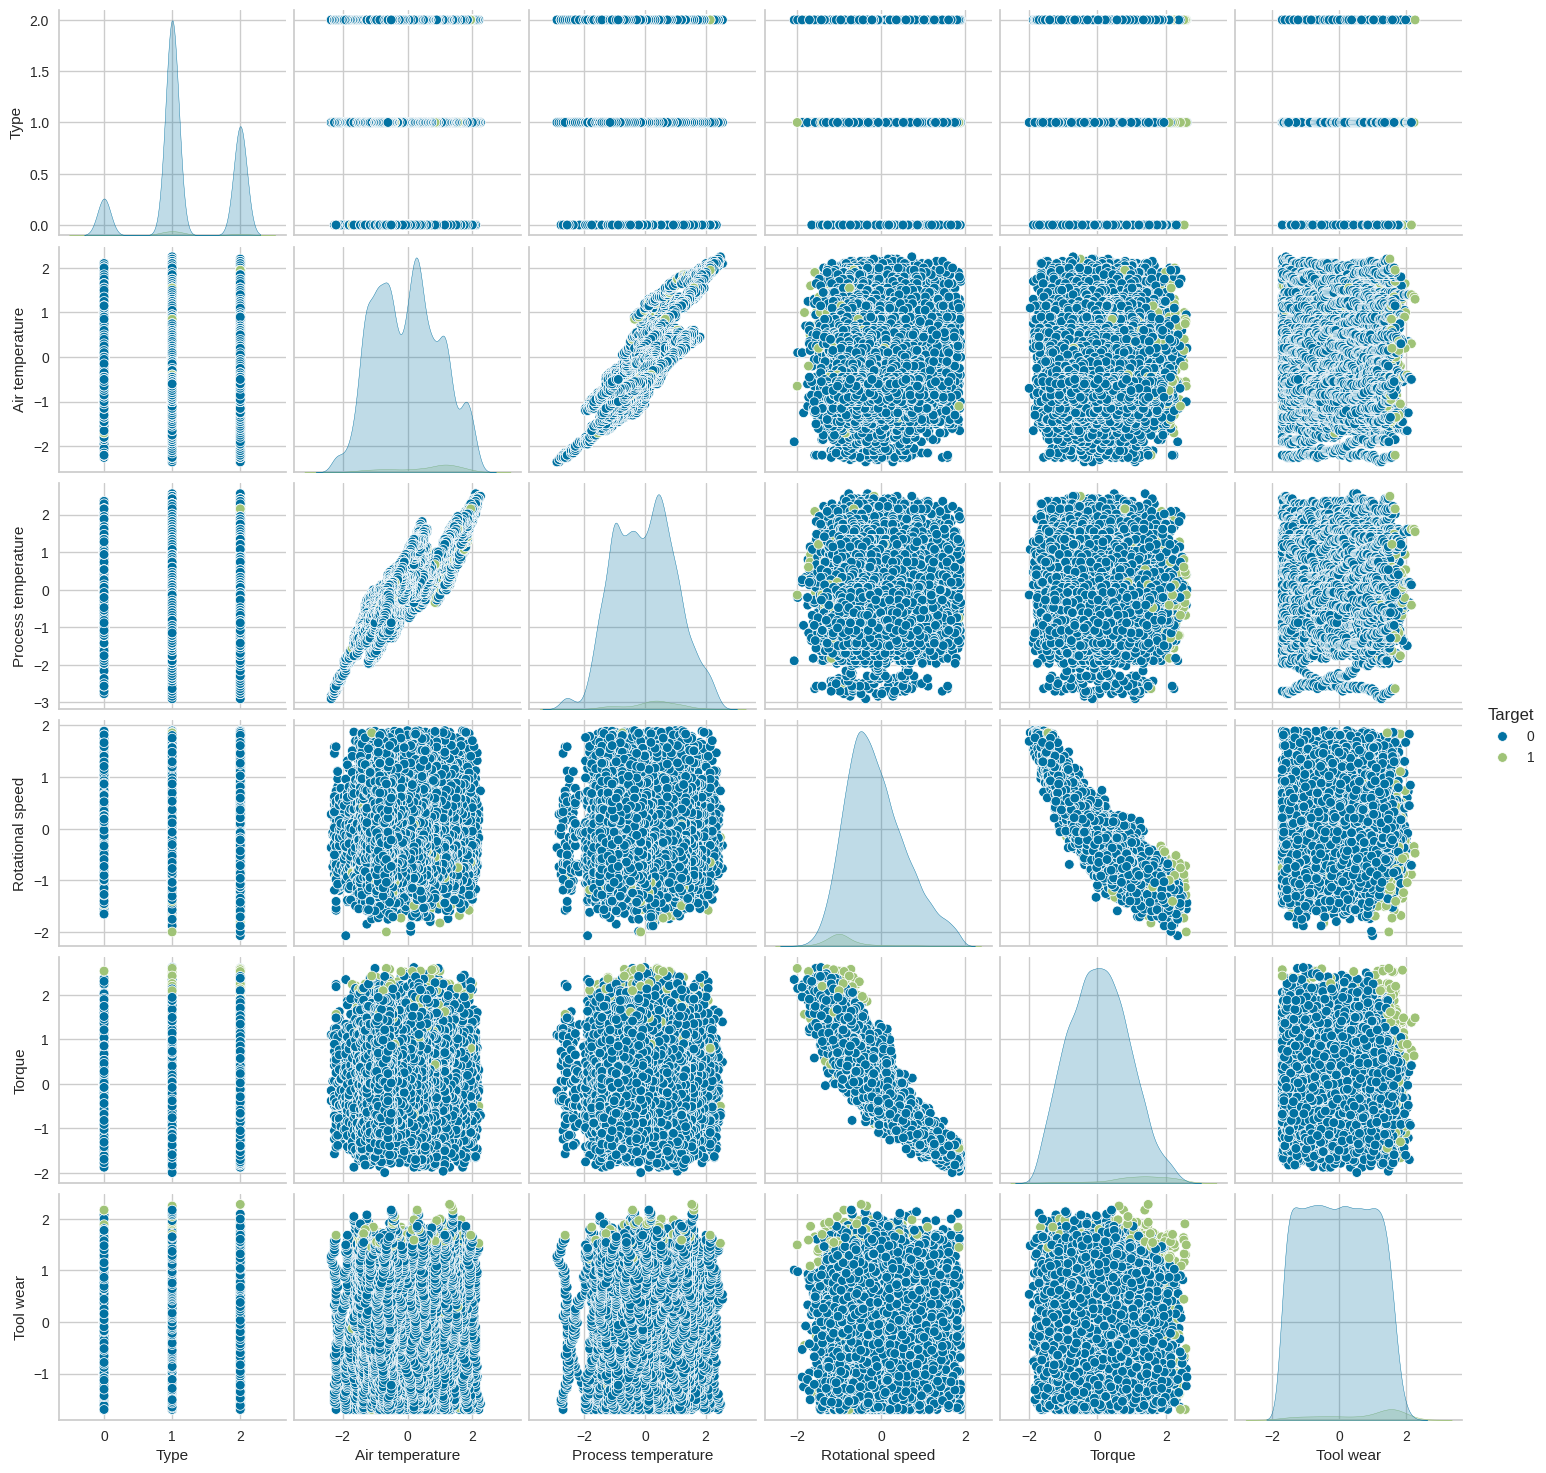

In [49]:
sns.pairplot(data, hue = 'Target')

#data profiling on data

In [50]:
profile = ProfileReport(data , title='predictive maintenance')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Perform Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

In [51]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3', 'PC4'])
print(pca_df.head())

        PC1       PC2       PC3       PC4
0 -1.369046  0.025589 -1.667075  0.806305
1 -1.313295  0.789101 -1.604098 -0.197327
2 -1.440097  0.721870 -1.570949 -0.195459
3 -1.344344  0.163840 -1.552246 -0.193977
4 -1.299353  0.289463 -1.519510 -0.195109


In [52]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.40076543 0.26156992 0.21400907 0.0774663 ]


#split data to X , Y

In [53]:
X = pca_df
y = data["Target"]

In [54]:
data["Target"].value_counts()

Target
0    9219
1     262
Name: count, dtype: int64

#resample the data to make it balanced

In [55]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [56]:
y_resampled.value_counts()

Target
0    9219
1    9219
Name: count, dtype: int64

#split data to train- test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# train the model & see the accuracy
#1- Support vector Classifier

In [58]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 91.36 %
Model Accuracy Score : 91.35 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1854
           1       0.87      0.97      0.92      1834

    accuracy                           0.91      3688
   macro avg       0.92      0.91      0.91      3688
weighted avg       0.92      0.91      0.91      3688

--------------------------------------------------------


# **Plot the ROC curve**


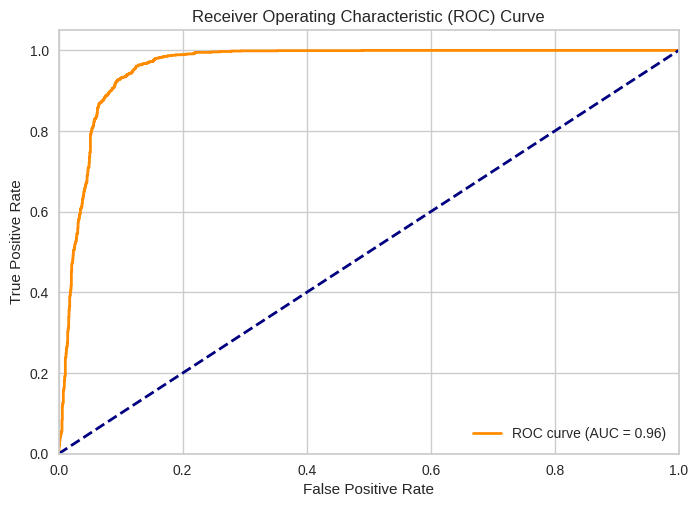

In [59]:
y_prob = svc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Plot the confusion matrix**

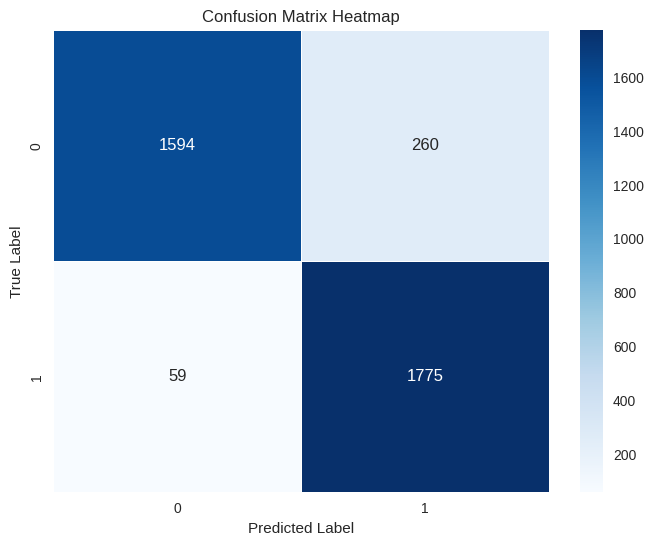

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

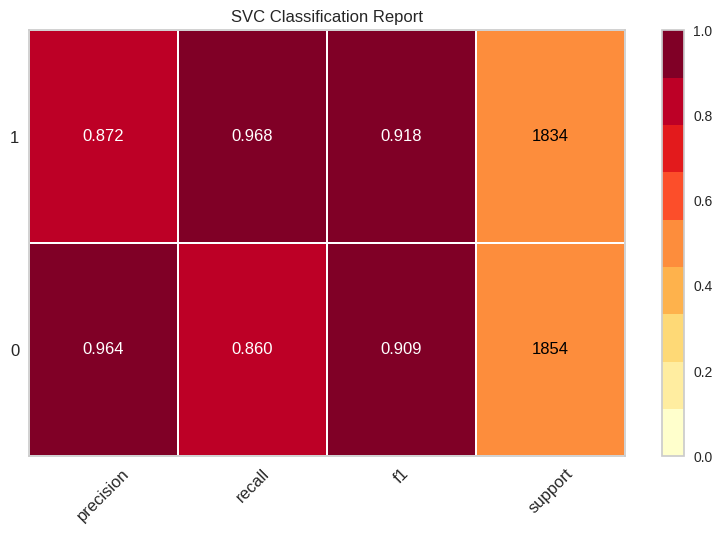

<Axes: title={'center': 'SVC Classification Report'}>

In [61]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svc, support=True)

visualizer.fit(X_train, y_train)


visualizer.score(X_test, y_test)

visualizer.show()

# **Mlflow for the svm algoritm**

In [64]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from sklearn.metrics import precision_score, recall_score, f1_score ,roc_curve ,auc

In [65]:
mlflow.set_experiment('Predictive maintenance final model')

2024/10/21 17:19:14 INFO mlflow.tracking.fluent: Experiment with name 'Predictive maintenance final model' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/606526670605957128', creation_time=1729531154715, experiment_id='606526670605957128', last_update_time=1729531154715, lifecycle_stage='active', name='Predictive maintenance final model', tags={}>

In [66]:
model = svc
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Signature and input example
input_example = X_test.iloc[:1]  # Example input
signature = infer_signature(X_train, model.predict(X_train))

Model, metrics, and artifacts logged successfully!


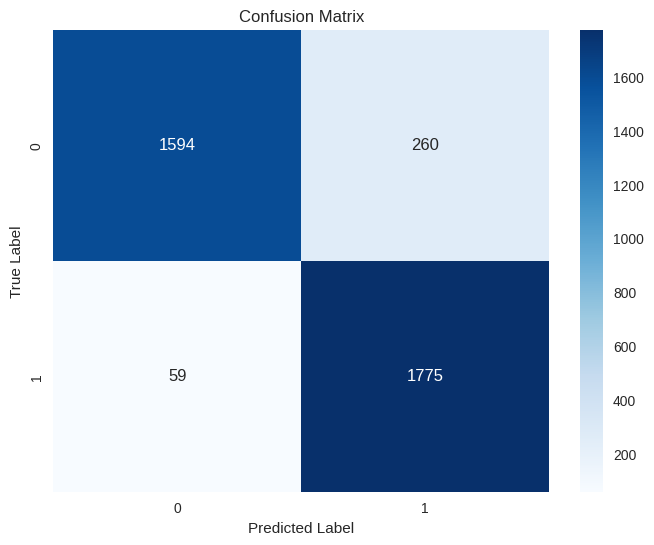

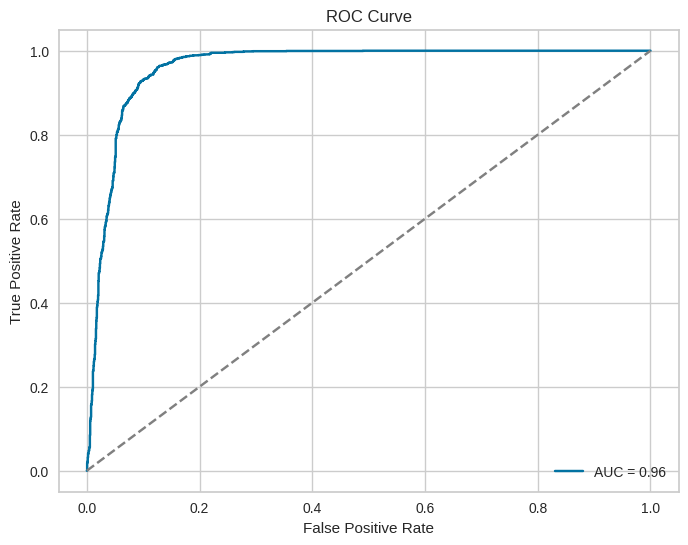

In [67]:
with mlflow.start_run():

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision",precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc_auc)

    # Log model with signature and input example
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

    # Plot Confusion Matrix and log as artifact
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")  # Save plot as image
    mlflow.log_artifact("confusion_matrix.png")  # Log as artifact

    # Plot ROC Curve and log as artifact
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")  # Save plot as image
    mlflow.log_artifact("roc_curve.png")  # Log as artifact

print("Model, metrics, and artifacts logged successfully!")

In [68]:
# now open anaconda prompt and write down "mlflow ui"
# than copy the url and paste it on the browser

# 2-Decision Tree

In [69]:

# decision = DecisionTreeClassifier()
# decision.fit(X_train, y_train)
# y_pred_dec = decision.predict(X_test)

decision_tree_model = DecisionTreeClassifier(
    max_depth=5,            # Limit the depth of the tree
    min_samples_split=10,   # Minimum samples required to split a node
    min_samples_leaf=5,     # Minimum samples required at a leaf node
    max_leaf_nodes=10       # Maximum number of leaf nodes
)

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dec = decision_tree_model.predict(X_test)


decision_train = round(decision_tree_model.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 91.72 %
Model Accuracy Score : 91.89 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      1854
           1       0.88      0.97      0.92      1834

    accuracy                           0.92      3688
   macro avg       0.92      0.92      0.92      3688
weighted avg       0.92      0.92      0.92      3688

--------------------------------------------------------


# **Plot the ROC curve**


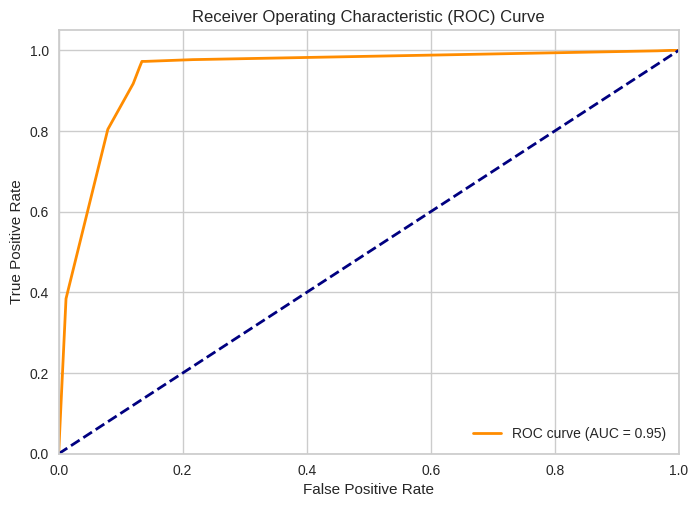

In [70]:
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Plot the confusion matrix**

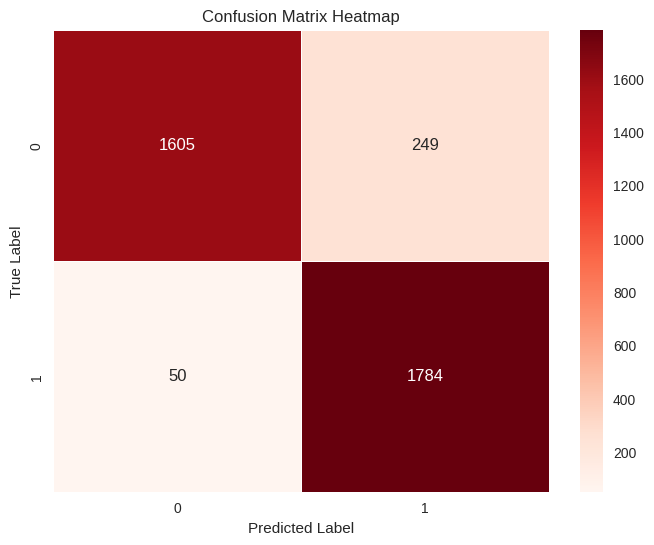

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred_dec)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

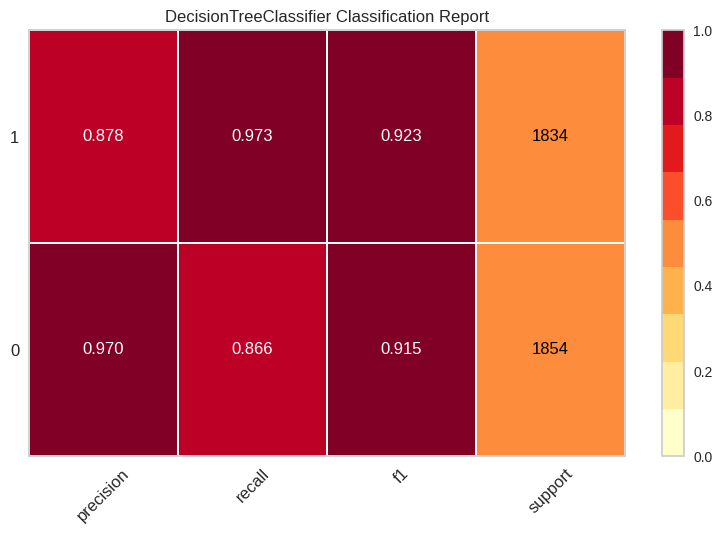

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [72]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(decision_tree_model, support=True)

visualizer.fit(X_train, y_train)


visualizer.score(X_test, y_test)

visualizer.show()

# **Mlflow  for Decision Tree model

In [73]:
DT_model = decision_tree_model
y_pred = DT_model.predict(X_test)
y_proba = DT_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

with mlflow.start_run():

    mlflow.log_param("min_samples_split", DT_model.min_samples_split)
    mlflow.log_param("max_depth", DT_model.max_depth)
    mlflow.log_param("min_samples_leaf",DT_model.min_samples_leaf)
    mlflow.log_param("max_leaf_nodes",DT_model.max_leaf_nodes)
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.6)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("confusion_matrix.png")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    plt.close()
    mlflow.log_artifact("roc_curve.png")

    mlflow.sklearn.log_model(DT_model, artifact_path="model")

print("Model and visualizations logged successfully!")

2024/10/21 17:20:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model and visualizations logged successfully!


 # 3- Random Forest

In [74]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1854
           1       0.95      0.99      0.97      1834

    accuracy                           0.97      3688
   macro avg       0.97      0.97      0.97      3688
weighted avg       0.97      0.97      0.97      3688

--------------------------------------------------------


# **Plot the ROC curve**


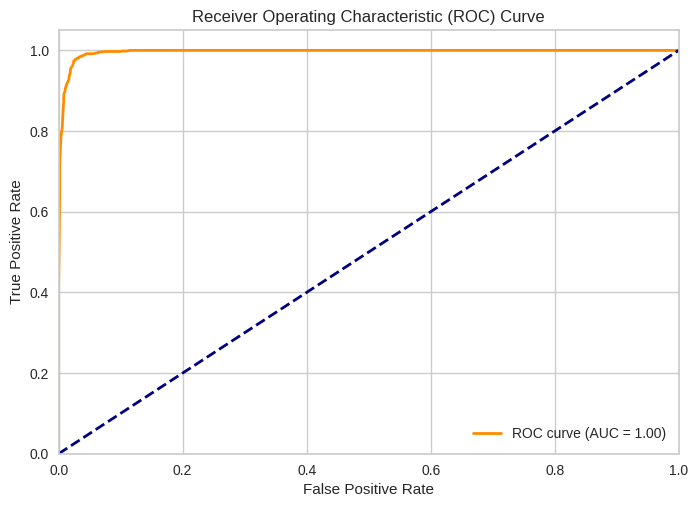

In [75]:
y_prob = random_forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Plot the confusion matrix**

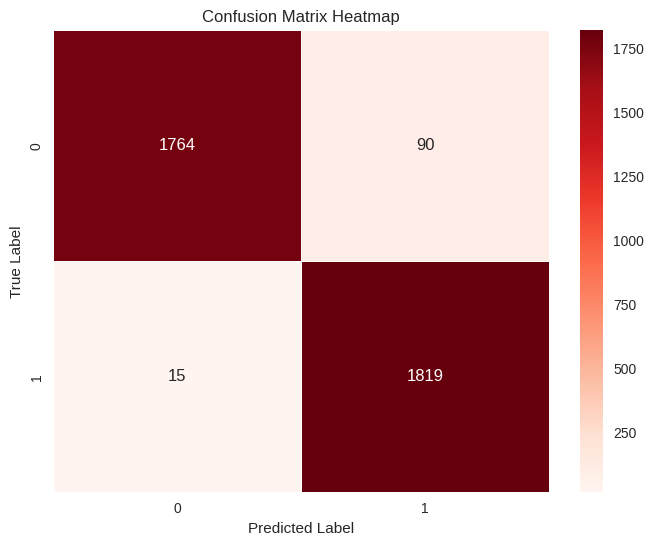

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

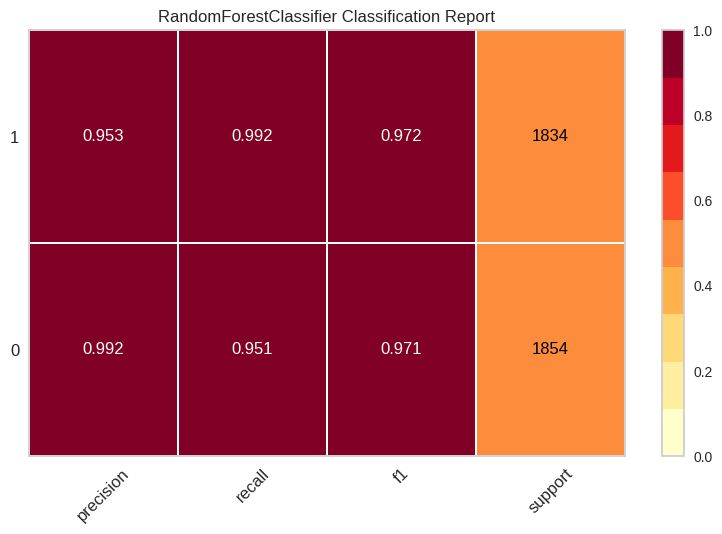

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [77]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(random_forest, support=True)

visualizer.fit(X_train, y_train)


visualizer.score(X_test, y_test)

visualizer.show()

# **Mlflow for Random Forest**

In [78]:
rf_model = random_forest
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

with mlflow.start_run():

    mlflow.log_param("n_estimators", rf_model.n_estimators)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.6)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("confusion_matrix.png")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    plt.close()
    mlflow.log_artifact("roc_curve.png")

    mlflow.sklearn.log_model(rf_model, artifact_path="model")

print("Model and visualizations logged successfully!")

2024/10/21 17:20:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model and visualizations logged successfully!


#hyper parameter tuning with random forest

In [79]:
param_space = {
    'n_estimators': (50, 500),         # Number of trees
    'max_depth': (5, 50),              # Maximum depth of each tree
    'min_samples_split': (2, 20),      # Minimum number of samples required to split a node
    'min_samples_leaf': (1, 20),       # Minimum number of samples required at a leaf node
    'max_features': [None, 'sqrt'],    # Corrected: 'auto' changed to None
}

rf = RandomForestClassifier(random_state=42)

bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=16,            # Number of parameter settings that are sampled
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available cores
    random_state=42,
    verbose=2
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  OrderedDict([('max_depth', 50), 

In [80]:
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=500, random_state=42)

In [81]:
y_pred_BS=rf_best.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_BS, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_BS))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1854
           1       0.95      0.99      0.97      1834

    accuracy                           0.97      3688
   macro avg       0.97      0.97      0.97      3688
weighted avg       0.97      0.97      0.97      3688

--------------------------------------------------------


# **Plot the ROC curve**


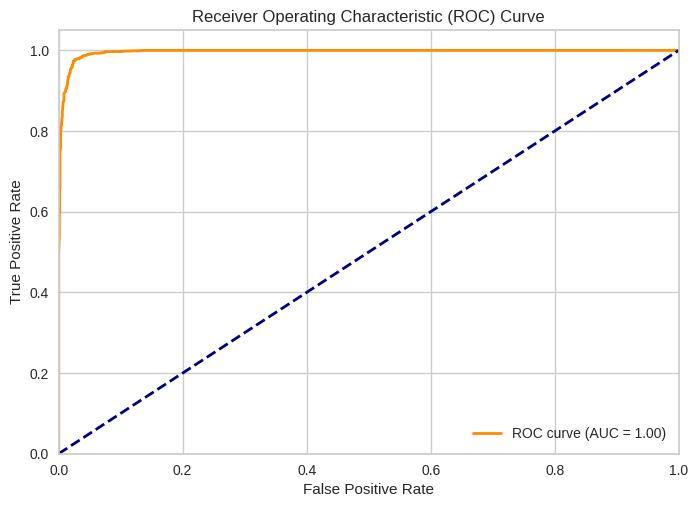

In [82]:
y_prob = rf_best.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

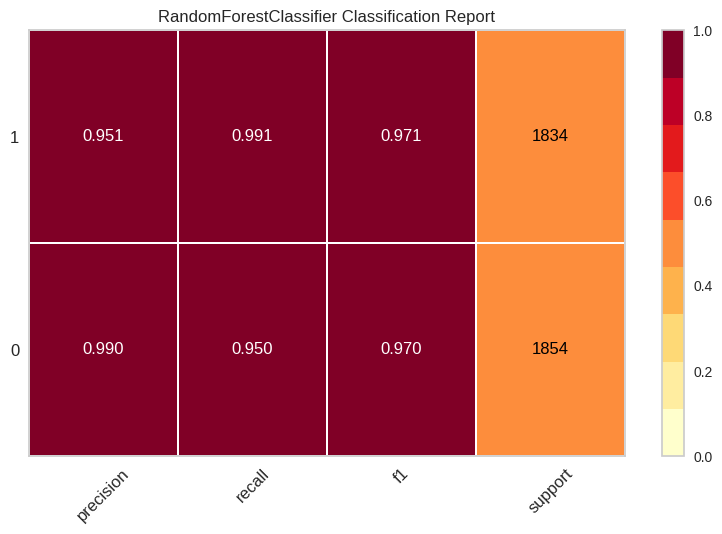

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [83]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_best, support=True)

visualizer.fit(X_train, y_train)


visualizer.score(X_test, y_test)

visualizer.show()

# ** mlflow for the bayes search model with random forest **

In [84]:
tuning_model = rf_best
y_pred = tuning_model.predict(X_test)
y_proba = tuning_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

with mlflow.start_run():

    mlflow.log_param("n_estimators", tuning_model.n_estimators)
    mlflow.log_param("max_depth", tuning_model.max_depth)
    mlflow.log_param("min_samples_split",tuning_model.min_samples_split)
    mlflow.log_param("min_samples_leaf",tuning_model.min_samples_leaf)
    mlflow.log_param("max_features",tuning_model.max_features)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.6)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.close()
    mlflow.log_artifact("confusion_matrix.png")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    plt.close()
    mlflow.log_artifact("roc_curve.png")

    mlflow.sklearn.log_model(tuning_model, artifact_path="model")

print("Model and visualizations logged successfully!")

2024/10/21 17:34:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model and visualizations logged successfully!


# **GANS**

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} for training.')


Using cpu for training.


In [86]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, output_dim),
            nn.Tanh()  # Output values will be scaled between [-1, 1]
        )

    def forward(self, z):
        return self.model(z)


In [87]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output is a probability (real or fake)
        )

    def forward(self, x):
        return self.model(x)


In [88]:
latent_dim = 100  # Size of latent space (input noise vector)
data_dim = 5  # Number of features in the maintenance data (adjust based on your dataset)

# Instantiate the networks
generator = Generator(input_dim=latent_dim, output_dim=data_dim).to(device)
discriminator = Discriminator(input_dim=data_dim).to(device)

# Optimizers for both networks
lr = 0.0002  # Learning rate
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function: Binary Cross-Entropy (BCE) Loss
criterion = nn.BCELoss()


In [89]:
# Example: Simulated real maintenance data (1000 samples, 5 features)
real_data = np.random.rand(1000, data_dim)  # Replace with your actual dataset
scaler = MinMaxScaler(feature_range=(-1, 1))  # Normalize to [-1, 1]
real_data = scaler.fit_transform(real_data)

# Convert the real data to PyTorch tensors
real_data = torch.tensor(real_data, dtype=torch.float32).to(device)


In [90]:
num_epochs = 5000  # Number of training epochs
batch_size = 64

# Function to generate random noise vectors
def generate_noise(batch_size, latent_dim):
    return torch.randn(batch_size, latent_dim).to(device)

for epoch in range(num_epochs):
    # Train Discriminator
    for _ in range(2):  # Train discriminator more frequently
        optimizer_D.zero_grad()

        # Real data
        real_samples = real_data[torch.randint(0, len(real_data), (batch_size,))]
        real_labels = torch.ones(batch_size, 1).to(device)  # Label: 1 (real)

        # Fake data generated by the generator
        noise = generate_noise(batch_size, latent_dim)
        fake_samples = generator(noise)
        fake_labels = torch.zeros(batch_size, 1).to(device)  # Label: 0 (fake)

        # Discriminator loss on real and fake data
        real_loss = criterion(discriminator(real_samples), real_labels)
        fake_loss = criterion(discriminator(fake_samples.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

    # Train Generator
    optimizer_G.zero_grad()

    # Generate fake samples and calculate generator loss
    noise = generate_noise(batch_size, latent_dim)
    generated_samples = generator(noise)
    generator_loss = criterion(discriminator(generated_samples), real_labels)  # Wants discriminator to output 1

    generator_loss.backward()
    optimizer_G.step()

    # Print losses occasionally
    if epoch % 500 == 0:
        print(f"Epoch {epoch}/{num_epochs} | D Loss: {d_loss.item():.4f} | G Loss: {generator_loss.item():.4f}")


Epoch 0/5000 | D Loss: 1.3719 | G Loss: 0.6802
Epoch 500/5000 | D Loss: 1.3687 | G Loss: 0.7397
Epoch 1000/5000 | D Loss: 1.3731 | G Loss: 0.6870
Epoch 1500/5000 | D Loss: 1.3499 | G Loss: 0.7006
Epoch 2000/5000 | D Loss: 1.3040 | G Loss: 0.7263
Epoch 2500/5000 | D Loss: 1.3585 | G Loss: 0.8211
Epoch 3000/5000 | D Loss: 1.2030 | G Loss: 0.8195
Epoch 3500/5000 | D Loss: 1.2749 | G Loss: 0.8363
Epoch 4000/5000 | D Loss: 1.1776 | G Loss: 0.8275
Epoch 4500/5000 | D Loss: 1.2128 | G Loss: 0.9107


Generated Synthetic Data:
 [[0.3621779  0.89323246 0.90044427 0.06434736 0.3913065 ]
 [0.32783177 0.43401563 0.31631026 0.90826595 0.68129575]
 [0.62346166 0.07548755 0.17198758 0.77528715 0.76332766]
 [0.20158257 0.49591208 0.40050152 0.76195806 0.76381874]
 [0.14434135 0.8816729  0.9627215  0.8289351  0.7138105 ]
 [0.72333235 0.3345511  0.44195682 0.5795146  0.1876541 ]
 [0.42808667 0.4880921  0.48712718 0.96911263 0.4486302 ]
 [0.48562703 0.9004875  0.93459433 0.01744459 0.2439945 ]
 [0.6988131  0.78979325 0.89773595 0.65158206 0.17465766]
 [0.8777318  0.83290666 0.12103801 0.5904828  0.07429764]]


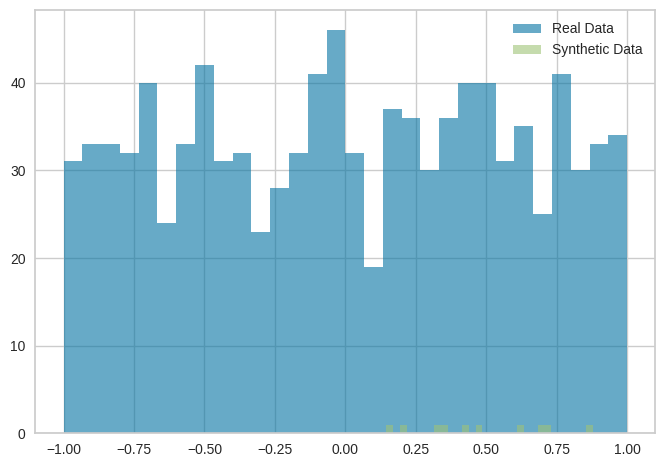

In [91]:
# Generate synthetic maintenance data
with torch.no_grad():
    noise = generate_noise(10, latent_dim)  # Generate 10 samples
    synthetic_data = generator(noise).cpu().numpy()

# Rescale synthetic data back to the original range
synthetic_data = scaler.inverse_transform(synthetic_data)
print("Generated Synthetic Data:\n", synthetic_data)

# Visualize one feature for comparison
plt.hist(real_data[:, 0].cpu(), bins=30, alpha=0.6, label='Real Data')
plt.hist(synthetic_data[:, 0], bins=30, alpha=0.6, label='Synthetic Data')
plt.legend()
plt.show()
